### **Continue...**


In [16]:
import pandas as pd
import numpy as np

In [17]:
df_cleaned=pd.read_csv('cleaned_data_nsch_2023.csv')

In [18]:
df_working=df_cleaned.copy()

In [19]:
df_working.head()

,GRADES,BEDTIME,HOURSLEEP,BIRTH_YR,BORNUSA,SCREENTIME,AGE
0,Mostly B's and C's,Sometimes,8 hours,2011,Yes,3 hours,12
1,Mostly A's,Always,10 hours,2009,Yes,4 or > hours,14
2,Mostly B's and C's,Usually,10 hours,2006,Yes,3 hours,17
3,Mostly A's and B's,Usually,10 hours,2010,Yes,3 hours,13
4,Mostly A's and B's,Usually,10 hours,2012,Yes,4 or > hours,11


In [20]:
sorted(df_working['AGE'].unique())

[np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(18)]

In [21]:
df_working.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   GRADES      5217 non-null   object
 1   BEDTIME     5217 non-null   object
 2   HOURSLEEP   5217 non-null   object
 3   BIRTH_YR    5217 non-null   int64 
 4   BORNUSA     5217 non-null   object
 5   SCREENTIME  5217 non-null   object
 6   AGE         5217 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 285.4+ KB


In [22]:
df_working['GRADES']=df_working['GRADES'].astype('category')
df_working['BEDTIME']=df_working['BEDTIME'].astype('category')
df_working['BORNUSA']=df_working['BORNUSA'].astype('category')


#### How many students in each grade group go to bed "Usually"?

In [23]:
bed_time=df_working[df_working['BEDTIME']=='Usually']['GRADES'].value_counts()
bed_time

GRADES
Mostly A's and B's                                505
Mostly A's                                        491
Mostly B's and C's                                359
This child's school does not give these grades    303
Mostly C's and D's                                191
Mostly D's and lower                               99
Name: count, dtype: int64

In [24]:
import matplotlib.pyplot as plt

In [25]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [26]:
plt.style.use( '_classic_test_patch')

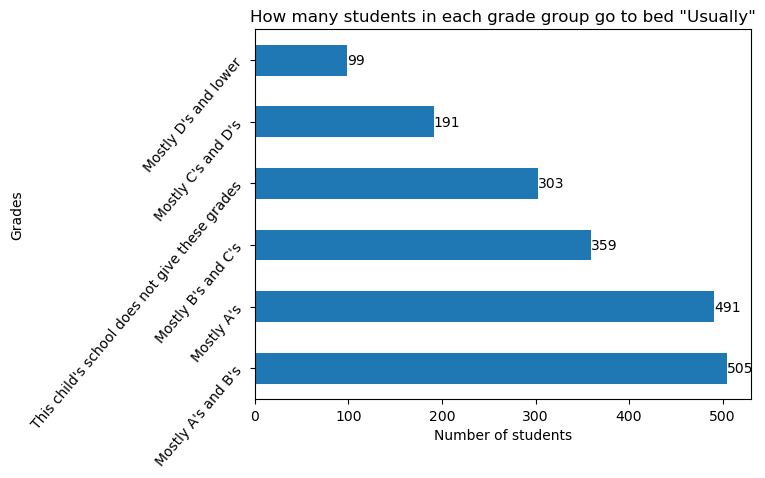

In [27]:

ax=bed_time.plot(kind='barh')
ax.bar_label(ax.containers[0],color='black')
plt.title('How many students in each grade group go to bed "Usually"')
plt.xlabel('Number of students')
plt.ylabel('Grades')
plt.yticks(rotation=50)
plt.show()

### **Based on this chart, we can see that a significant number of students who usually go to bed at the same time have better grades.**

#### Count how many students with each screen time value have “Mostly A’s”

In [31]:
screen_time_grade_A=df_working[df_working['GRADES']=="Mostly A's"]['SCREENTIME'].value_counts()
screen_time_grade_A

SCREENTIME
4 or > hours    330
2 hours         301
3 hours         283
1 hour          213
< 1 hour        159
Name: count, dtype: int64

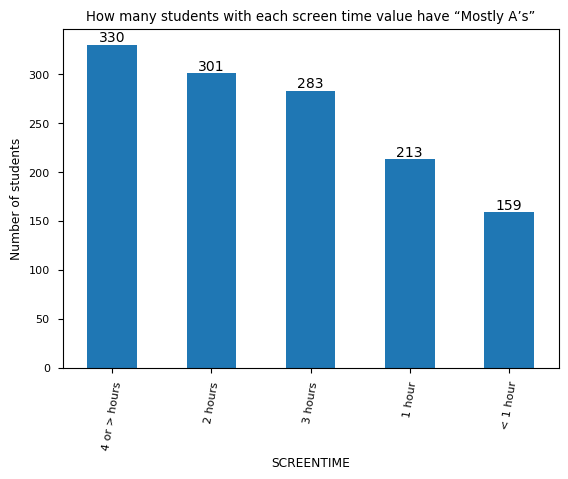

In [32]:
plt.style.use('_classic_test_patch')
plt.title('How many students with each screen time value have “Mostly A’s”')
ax=screen_time_grade_A.plot(kind='bar')
ax.bar_label(ax.containers[0],color='black')
plt.ylabel('Number of students')
plt.xticks(rotation=80)
plt.show()

### **This chart shows that the majority of students with higher grades also have many hours of screen time.**

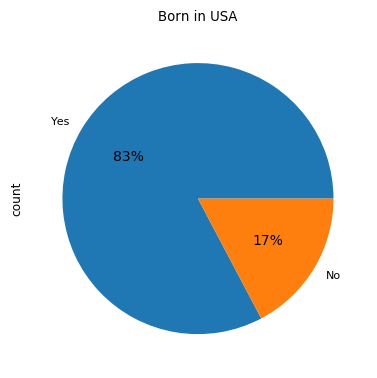

In [30]:
plt.style.use('seaborn-v0_8-paper')

plt.title('Born in USA')
df_working['BORNUSA'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()


##### The bar chart shows that a majority of participants (around 80%) were born in the USA. This suggests the dataset may represent a mostly domestic population. Understanding this distribution is important when interpreting behaviors that could vary based on cultural or regional backgrounds.

### **Conclusion:**

#### Based on the charts above, students who maintain a consistent bedtime tend to achieve better grades. However, surprisingly, many students with higher grades also report having long screen time. This suggests that while a regular sleep routine may positively influence academic performance, high screen time does not necessarily prevent students from achieving good grades — possibly due to how that screen time is used (e.g., for studying vs. entertainment).